## **Overfitting, underfitting, bias-variance tradeoff:** Continuation

*This notebook is a collection of several articles online which describe the issue of overfitting and underfitting [1,2]*

In this continuation workbook, we are going to begin with a discussion of bias and variance [3]


**Bias**

Remember Mean Squared Error (MSE)?  It the total error between the model and known points. However, the difference between any single point and the model may vary greatly.  The average difference between a point and the model is called the bias.  Sometimes, we use the term accuracy.



**Variance**

If we are interested in the average differene between points and the model, then we should also look at the variation between the difference between points and the model.  This is the Varaince.  Sometimes, we use the term precision.


[1] https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

[2] https://www.dataquest.io/blog/learning-curves-machine-learning/

[3] https://towardsdatascience.com/tradeoff-bias-or-variance-1409eec38caf


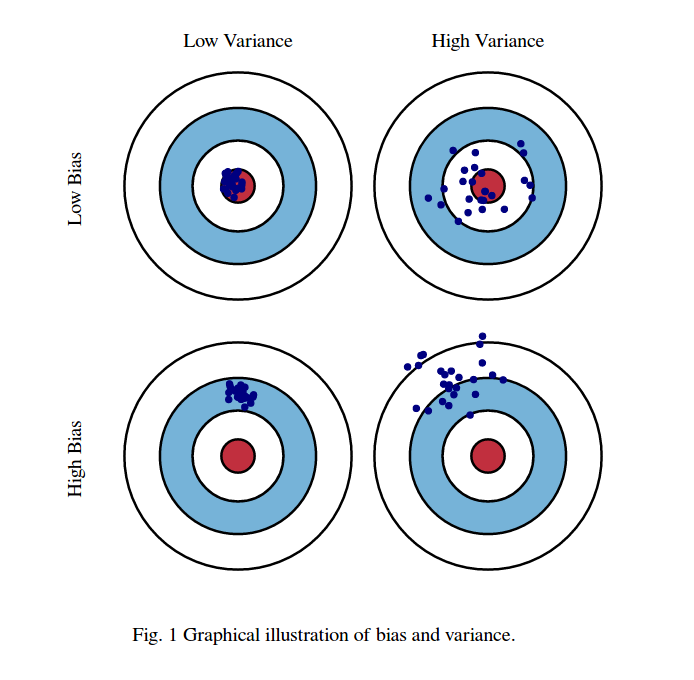

In model development, there is a trade off between bias and variance.  This is directly related to underfitting and over fitting.  An underfit model is likely over-simplistic.  As such, the model can't capture the variability of the data.  An overfit model is likely too complex and therefor fits the data very well, but doesn't generally.  This leads to the very common bias-variance curve.

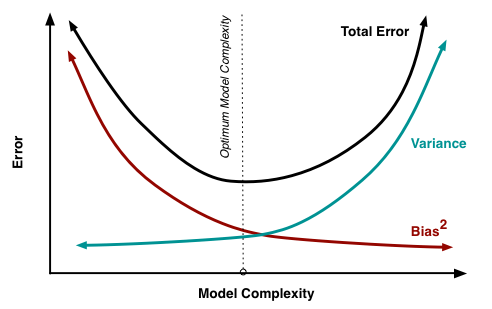

How do we try to balance the trade off?

Well, let's consider how data is used when we train a model.  

1) We give the algorithm the input data and know output labels.  That "training" data is a great way to decrease the bias, because we are training to it.  We are able to fit as complex of a model as we want (and reduce the average error).

2) We then look at some new data, and we find out if the model generalizes.  This is often called "testing" data.

Ultimately, it looks like we need two types of data -- training data to drive down bias and testing data to drive down variance.   

**Using two datasets allows us to "optimize" the model.**

In [ ]:
# Let's look at a simple example using some real data.

# The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), 
# when the power plant was set to work with full load. Features consist of:
# Temperature (T), 
# Ambient Pressure (AP), 
# Relative Humidity (RH),
# Exhaust Vacuum (V)
# Predict: Net hourly electrical energy output (PE) of the plant

import pandas as pd
fn = 'https://github.com/billcary/uci_combined_cycle_power_plant/raw/master/data/Folds5x2_pp.xlsx'

electricity = pd.read_excel(fn)
print(electricity.info())
electricity.head(3)



In [ ]:
# Let's continue to use linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Using all variables expect PE to predict PE
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

# We need to determine how many samples to use in training (and how many we leave for testing)

# Only one data point is used to train the model
training_size = [1]

# Now we setup and run our model

args = {
    'estimator': LinearRegression(), # Linear Regression model
    'X': electricity[features], # input features 
    'y': electricity[target], # the goal of what we are trying to predict
    'train_sizes': training_size,
    'cv': 5, # run the training 5 times (cross-validation topic coming next!)
    'scoring': 'neg_mean_squared_error' #what metric to report (this is MSE)
}

train_sizes, train_scores, validation_scores = learning_curve(**args)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)




In [ ]:
# That wasn't very interesting.  Can you really train a model with a single data point? No
# That is why the score "Validation Score" is so large

# Try out different training sizes
training_size = [___]

# Now we setup and run our model

args = {
    'estimator': LinearRegression(), # Linear Regression model
    'X': electricity[features], # input features 
    'y': electricity[target], # the goal of what we are trying to predict
    'train_sizes': training_size,
    'cv': 5, # run the training 5 times (cross-validation topic coming next!)
    'scoring': 'neg_mean_squared_error' #what metric to report (this is MSE)
}

train_sizes, train_scores, validation_scores = learning_curve(**args)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)



In [ ]:
# Ok, presumable we are getting better with more samples.  

# What would the upper limit be in theory?

# Let's quantify the impact on the numnber of samples in the training dataset.

# It turns out that we can list multiple training sizes for this function:

training_size = [1, 100, 500, 2000, 5000, 7654]

# Now we setup and run our model

args = {
    'estimator': LinearRegression(), # Linear Regression model
    'X': electricity[features], # input features 
    'y': electricity[target], # the goal of what we are trying to predict
    'train_sizes': training_size,
    'cv': 5,  # run the training 5 times (cross-validation topic coming next!)
    'scoring': 'neg_mean_squared_error' #what metric to report (this is MSE)
}

train_sizes, train_scores, validation_scores = learning_curve(**args)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


In [ ]:
# That's a lot of data.  Let's summerize it better.

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

# And we can plot it
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

The learning curve plot is an excellent way to see the trade off between the amount of data used for training vs the amount of data used for testing.  In the case above, as more data is used, the training error and the validation error converge.

There is some general wisdom regarding learning curves which we can look at:

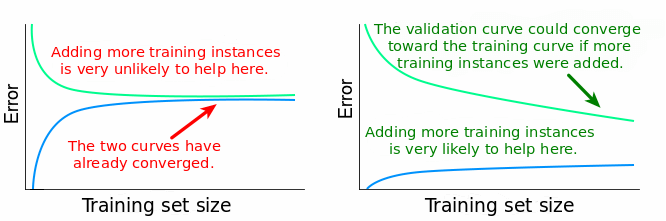

Let's further consider how learning curves can tell us about the bias/variance trade off:

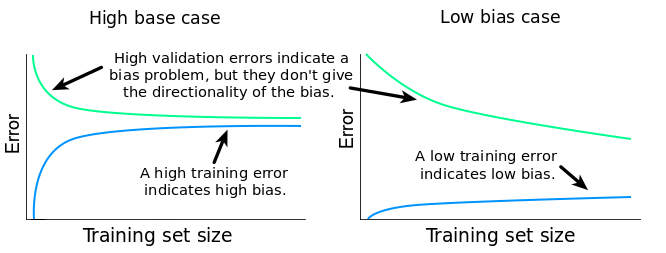


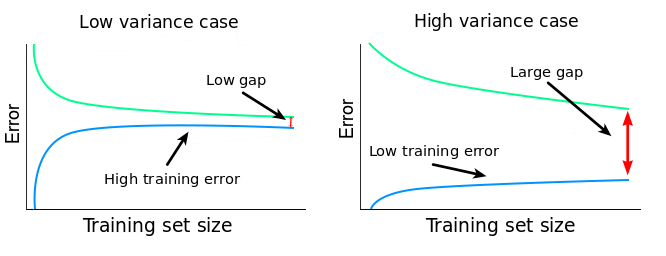


## **Closing Remarks:**

We have learned about underfitting and overfitting of models.  The issues of over and under fitting can be formulated as the bias-variance trade off.  Learning curves can be helpful in understanding how well (or poorly) the model is training.

Some gotchas:

(1) Ideally, you would like to see the two curves converging asymptomatically at zero (no errors in the training set and no errors with the testing data set).  That will likely never happen due to random effects (i.e. truly random errors).  The asymptote will say something about "the best you can do".

(2) Some advanced machine learning models are iterative in nature.  That is to say that they develop a model, test it, and then develop a new model based on what they learn in the current model.  In these cases, learning curves can tell us something about how the model is developing.  For such models, the x axis is no longer the training set size.  It is the number of iterations of training (teaser for future workshop topics!).

(3) So far we have been discussing *regression problems* -- trying to create a model that approximates a continuous function.  At some point in the future, we will discuss *classification problems*.  While classification models are fundimentally different than regression problems, these types of analyses can (and should) be used to characterize the model.